<a href="https://colab.research.google.com/github/kavyajeetbora/modern_geospatial_stack/blob/master/notebooks/01_xarray_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Xarray Introduction

<img src='https://docs.xarray.dev/en/stable/_images/dataset-diagram.png' height=300/>


**Reference**

[Introduction to xarray data structure](https://tutorial.xarray.dev/fundamentals/01_datastructures.html)

In [1]:
!pip install -q xarray[complete]

In [2]:
import xarray as xr
import numpy as np

## DataArray

The DataArray class is used to attach a name, dimension names, labels, and attributes to an array

In [3]:
ds = xr.tutorial.load_dataset("air_temperature")
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

## Accessing the array

In [4]:
ds['air'].data

array([[[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
         238.59999],
        [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
         239.29999],
        [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
         241.7    ],
        ...,
        [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
         294.69998],
        [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
         295.19998],
        [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
         296.6    ]],

       [[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999,
         235.79999],
        [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    ,
         235.7    ],
        [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   ,
         238.5    ],
        ...,
        [296.4    , 295.9    , 296.19998, ..., 295.4    , 295.1    ,
         294.79   ],
        [296.19998, 296.69998, 296.79   , ..., 295.6    , 295.5    ,
   

## Named dimensions

In [5]:
ds["air"].dims

('time', 'lat', 'lon')

## Coordinates

In [6]:
ds['air'].coords

Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

## Attributes

Basically used to store the metadata

In [7]:
ds.air.attrs

{'long_name': '4xDaily Air temperature at sigma level 995',
 'units': 'degK',
 'precision': 2,
 'GRIB_id': 11,
 'GRIB_name': 'TMP',
 'var_desc': 'Air temperature',
 'dataset': 'NMC Reanalysis',
 'level_desc': 'Surface',
 'statistic': 'Individual Obs',
 'parent_stat': 'Other',
 'actual_range': array([185.16, 322.1 ], dtype=float32)}

## Converting to pandas

In [8]:
import pandas as pd

series = pd.Series(np.ones((10,)), index=list(('abcdefghij')))
series

a    1.0
b    1.0
c    1.0
d    1.0
e    1.0
f    1.0
g    1.0
h    1.0
i    1.0
j    1.0
dtype: float64

In [9]:
arr = series.to_xarray()
arr

<xarray.DataArray (index: 10)>
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
Coordinates:
  * index    (index) object 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j'

In [10]:
arr.to_pandas()

index
a    1.0
b    1.0
c    1.0
d    1.0
e    1.0
f    1.0
g    1.0
h    1.0
i    1.0
j    1.0
dtype: float64

Coverting the air data to series. Note that it will be converted to series with multiindex depending on the dimension of the xarray dataset

In [11]:
ds.air.to_series()

time                 lat   lon  
2013-01-01 00:00:00  75.0  200.0    241.199997
                           202.5    242.500000
                           205.0    243.500000
                           207.5    244.000000
                           210.0    244.099991
                                       ...    
2014-12-31 18:00:00  15.0  320.0    297.389984
                           322.5    297.190002
                           325.0    296.489990
                           327.5    296.190002
                           330.0    295.690002
Name: air, Length: 3869000, dtype: float32

Converting to pandas DataFrame

In [12]:
ds.air.to_dataframe()

air
time                lat  lon              
2013-01-01 00:00:00 75.0 200.0  241.199997
                         202.5  242.500000
                         205.0  243.500000
                         207.5  244.000000
                         210.0  244.099991
...                                    ...
2014-12-31 18:00:00 15.0 320.0  297.389984
                         322.5  297.190002
                         325.0  296.489990
                         327.5  296.190002
                         330.0  295.690002

[3869000 rows x 1 columns]

# Creating Data Structures

We’ll learn how to create Xarray objects from scratch

Our goal will be to recreate the `ds.air` DataArray starting with the underlying numpy data

In [13]:
xr.set_options(display_expand_data=False)

rng = np.random.default_rng(seed=0)  # we'll use this later

In [14]:
ds = xr.tutorial.load_dataset("air_temperature")
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [15]:
ds.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [16]:
array = ds.air.data
array.shape

(2920, 25, 53)

## Create DataArray

In [17]:
xr.DataArray(array)

<xarray.DataArray (dim_0: 2920, dim_1: 25, dim_2: 53)>
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Dimensions without coordinates: dim_0, dim_1, dim_2

## Enter Dimensions

This works. Notice that the default dimension names are not so useful: `dim_0`, `dim_1`, `dim_2`

In [18]:
xr.DataArray(array, dims=("time", "lat", "lon"))

<xarray.DataArray (time: 2920, lat: 25, lon: 53)>
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Dimensions without coordinates: time, lat, lon

## Coordinates

Much better! But notice we have no entries under “Coordinates”.

First we’ll simply add values for lon using the coords kwarg. For this datasets, longitudes are regularly spaced at 2.5° intervals between 200°E and 330°E

In [19]:
lon_values = np.arange(200, 331, 2.5)
da = xr.DataArray(array, dims=("time", "lat", "lon"), coords={"lon": lon_values})
da

<xarray.DataArray (time: 2920, lat: 25, lon: 53)>
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * lon      (lon) float64 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
Dimensions without coordinates: time, lat

In [20]:
da.coords["lat"] = np.arange(75, 14.9, -2.5)
da

<xarray.DataArray (time: 2920, lat: 25, lon: 53)>
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * lon      (lon) float64 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * lat      (lat) float64 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
Dimensions without coordinates: time

## Adding Attributes


In [21]:
da.attrs["attribute"] = "hello"
da

<xarray.DataArray (time: 2920, lat: 25, lon: 53)>
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * lon      (lon) float64 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * lat      (lat) float64 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
Dimensions without coordinates: time
Attributes:
    attribute:  hello

Alternatively

In [22]:
lon_da = xr.DataArray(lon_values, dims="lon")
da2 = xr.DataArray(
    array, dims=("time", "lat", "lon"), coords={"lon": lon_da}, attrs={"About": "Air Temperature Data"}
)
da2

<xarray.DataArray (time: 2920, lat: 25, lon: 53)>
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * lon      (lon) float64 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
Dimensions without coordinates: time, lat
Attributes:
    About:    Air Temperature Data

## Non-dimensional coordinates

Here we demonstrate the “tuple” form of assigninment: `(dims, data, attrs)`

In [23]:
da.coords["itime"] = ("time", np.arange(2920), {"name": "value"})
da

<xarray.DataArray (time: 2920, lat: 25, lon: 53)>
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * lon      (lon) float64 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * lat      (lat) float64 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
    itime    (time) int64 0 1 2 3 4 5 6 7 ... 2913 2914 2915 2916 2917 2918 2919
Dimensions without coordinates: time
Attributes:
    attribute:  hello

## Exercise


create a DataArray named “height” from random data:

In [24]:
arr = rng.random((180, 360)) * 400
arr.shape

(180, 360)

### Dimensions

In [25]:
da3 = xr.DataArray(arr, dims=('latitude', 'longitude'), name='height')
da3

<xarray.DataArray 'height' (latitude: 180, longitude: 360)>
254.8 107.9 16.39 6.611 325.3 365.1 ... 77.56 224.5 325.4 130.9 101.7 159.5
Dimensions without coordinates: latitude, longitude

### Dimension coodinates

In [26]:
latitude = np.arange(-90,90,1)
longitude = np.arange(-180, 180, 1)

da3 = xr.DataArray(arr, dims=('latitude', 'longitude'), coords={"latitude": latitude, 'longitude':longitude},name='height')
da3

<xarray.DataArray 'height' (latitude: 180, longitude: 360)>
254.8 107.9 16.39 6.611 325.3 365.1 ... 77.56 224.5 325.4 130.9 101.7 159.5
Coordinates:
  * latitude   (latitude) int64 -90 -89 -88 -87 -86 -85 ... 84 85 86 87 88 89
  * longitude  (longitude) int64 -180 -179 -178 -177 -176 ... 176 177 178 179

### Add Metadata

- height: “type”: “ellipsoid”
- latitude: “type”: “geodetic”
- longitude: “prime_meridian”: “greenwich”

In [27]:
da3 = xr.DataArray(
    arr,
    dims=('lat', 'longitude'),
    coords={"latitude": ('lat', latitude, {'type': 'geodetic'}),
            'longitude':('longitude', longitude, {'type': 'geodetic'})
        },
    attrs={'type':'ellipsoid'},
    name='height'
)
da3

<xarray.DataArray 'height' (lat: 180, longitude: 360)>
254.8 107.9 16.39 6.611 325.3 365.1 ... 77.56 224.5 325.4 130.9 101.7 159.5
Coordinates:
    latitude   (lat) int64 -90 -89 -88 -87 -86 -85 -84 ... 83 84 85 86 87 88 89
  * longitude  (longitude) int64 -180 -179 -178 -177 -176 ... 176 177 178 179
Dimensions without coordinates: lat
Attributes:
    type:     ellipsoid

## Datasets

Dataset objects collect multiple data variables, each with possibly different dimensions.

The constructor of Dataset takes three parameters:

1. data_vars: dict-like mapping names to values. Values are either DataArray objects or defined with tuples consisting of of dimension names and arrays.
2. coords: same as for DataArray
3. attrs: same as for Dataset

In [28]:
xr.Dataset()

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*

### Dataset variables

In [29]:
ds = xr.Dataset({"air": da, "air2": da2})
ds

<xarray.Dataset>
Dimensions:  (lon: 53, lat: 25, time: 2920)
Coordinates:
  * lon      (lon) float64 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * lat      (lat) float64 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
    itime    (time) int64 0 1 2 3 4 5 6 7 ... 2913 2914 2915 2916 2917 2918 2919
Dimensions without coordinates: time
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
    air2     (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7

In [30]:
ds["air3"] = da
ds

<xarray.Dataset>
Dimensions:  (lon: 53, lat: 25, time: 2920)
Coordinates:
  * lon      (lon) float64 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * lat      (lat) float64 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
    itime    (time) int64 0 1 2 3 4 5 6 7 ... 2913 2914 2915 2916 2917 2918 2919
Dimensions without coordinates: time
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
    air2     (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
    air3     (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7

### Coordinates

In [31]:
xr.Dataset(
    {"air": da, "air2": da2},
    coords={"time": pd.date_range("2013-01-01", "2014-12-31 18:00", freq="6H")},
)

<xarray.Dataset>
Dimensions:  (lon: 53, lat: 25, time: 2920)
Coordinates:
  * lon      (lon) float64 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * lat      (lat) float64 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
    itime    (time) int64 0 1 2 3 4 5 6 7 ... 2913 2914 2915 2916 2917 2918 2919
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
    air2     (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7

Again we can assign coordinate variables after a Dataset has been created

In [32]:
ds.coords["time"] = pd.date_range("2013-01-01", "2014-12-31 18:00", freq="6H")
ds

<xarray.Dataset>
Dimensions:  (lon: 53, lat: 25, time: 2920)
Coordinates:
  * lon      (lon) float64 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * lat      (lat) float64 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
    itime    (time) int64 0 1 2 3 4 5 6 7 ... 2913 2914 2915 2916 2917 2918 2919
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
    air2     (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
    air3     (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7

### Attributes

In [33]:
xr.Dataset(
    {"air": da, "air2": da2},
    coords={"time": pd.date_range("2013-01-01", "2014-12-31 18:00", freq="6H")},
    attrs={"key0": "value0"},
)

<xarray.Dataset>
Dimensions:  (lon: 53, lat: 25, time: 2920)
Coordinates:
  * lon      (lon) float64 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * lat      (lat) float64 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
    itime    (time) int64 0 1 2 3 4 5 6 7 ... 2913 2914 2915 2916 2917 2918 2919
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
    air2     (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    key0:     value0

## Exercise


In [34]:
height = rng.random((180, 360)) * 400
gravity_anomaly = rng.random((180, 360)) * 400 - 200

height.shape, gravity_anomaly.shape

((180, 360), (180, 360))

In [35]:
height_da = xr.DataArray(height, dims=('latitude', 'longitude'))
gravity_da = xr.DataArray(gravity_anomaly, dims=('latitude', 'longitude'))
ds2 = xr.Dataset(
    {'height': height_da, 'gravity_anomaly': gravity_da}
)
ds2

<xarray.Dataset>
Dimensions:          (latitude: 180, longitude: 360)
Dimensions without coordinates: latitude, longitude
Data variables:
    height           (latitude, longitude) float64 192.4 101.9 ... 303.5 121.3
    gravity_anomaly  (latitude, longitude) float64 186.1 -20.97 ... 133.2 -175.9

### Add coordinates

In [36]:
ds2 = xr.Dataset(
    data_vars = {'height': (('latitude', 'longitude'), height, {"ellipsoid": "wgs84"}),
    'gravity_anomaly': (('latitude', 'longitude'), gravity_anomaly, {"ellipsoid": "grs80"})
     },

    coords = {
        'latitude': ('latitude', np.arange(-90,90,1), {'type':'geodetic'}),
        'longitude': ('longitude', np.arange(-180,180,1), {"prime_meridian": "greenwich"})
    }
)

ds2

<xarray.Dataset>
Dimensions:          (latitude: 180, longitude: 360)
Coordinates:
  * latitude         (latitude) int64 -90 -89 -88 -87 -86 -85 ... 85 86 87 88 89
  * longitude        (longitude) int64 -180 -179 -178 -177 ... 176 177 178 179
Data variables:
    height           (latitude, longitude) float64 192.4 101.9 ... 303.5 121.3
    gravity_anomaly  (latitude, longitude) float64 186.1 -20.97 ... 133.2 -175.9

# Reading and writing files

One of Xarray’s most widely used features is its ability to read from and write to a variety of data formats. For example, Xarray can read the following formats using open_dataset/open_mfdataset:

- NetCDF
- Zarr

## NetCDF

The recommended way to store xarray data structures is NetCDF, which is a binary file format for self-described datasets that originated in the geosciences. Xarray is based on the netCDF data model, so netCDF files on disk directly correspond to Dataset objects.

<img src='https://www.unidata.ucar.edu/images/logos/netcdf-400x400.png' height=200/>

Let’s first create some datasets and write them to disk using to_netcdf, which takes the path we want to write to:

In [37]:
# Ensure random arrays are the same each time
np.random.seed(0)

### Writing arrays to netCDF

In [38]:
ds1 = xr.Dataset(
    data_vars={
        "a": (("x", "y"), np.random.randn(4, 2)),
        "b": (("z", "x"), np.random.randn(6, 4)),
    },
    coords={
        "x": np.arange(4),
        "y": np.arange(-2, 0),
        "z": np.arange(-3, 3),
    },
)
ds2 = xr.Dataset(
    data_vars={
        "a": (("x", "y"), np.random.randn(7, 3)),
        "b": (("z", "x"), np.random.randn(2, 7)),
    },
    coords={
        "x": np.arange(6, 13),
        "y": np.arange(3),
        "z": np.arange(3, 5),
    },
)

# write datasets
ds1.to_netcdf("ds1.nc")
ds2.to_netcdf("ds2.nc")

# write dataarray
ds1.a.to_netcdf("da1.nc")

### Reading netCDF file

In [39]:
xr.open_dataset("ds1.nc")

<xarray.Dataset>
Dimensions:  (x: 4, y: 2, z: 6)
Coordinates:
  * x        (x) int64 0 1 2 3
  * y        (y) int64 -2 -1
  * z        (z) int64 -3 -2 -1 0 1 2
Data variables:
    a        (x, y) float64 ...
    b        (z, x) float64 ...

In [40]:
xr.open_dataarray("da1.nc")

<xarray.DataArray 'a' (x: 4, y: 2)>
[8 values with dtype=float64]
Coordinates:
  * x        (x) int64 0 1 2 3
  * y        (y) int64 -2 -1

## Zarr

<img src='https://zarr.readthedocs.io/en/stable/_static/logo1.png' height=200/>

Zarr is a Python package and data format providing an implementation of chunked, compressed, N-dimensional arrays. Zarr has the ability to store arrays in a range of ways, including in memory, in files, and in cloud-based object storage such as Amazon S3 and Google Cloud Storage. Xarray’s Zarr backend allows xarray to leverage these capabilities

Zarr files can be written with:

In [41]:
ds1.to_zarr("ds1.zarr", mode="w")

We can then read the created file with:

setting the chunks parameter to None avoids dask

In [42]:
xr.open_zarr("ds1.zarr", chunks=None)

<xarray.Dataset>
Dimensions:  (x: 4, y: 2, z: 6)
Coordinates:
  * x        (x) int64 0 1 2 3
  * y        (y) int64 -2 -1
  * z        (z) int64 -3 -2 -1 0 1 2
Data variables:
    a        (x, y) float64 ...
    b        (z, x) float64 ...

## Raster files using rioxarray

`rioxarray` is an Xarray extension that allows reading and writing a wide variety of geospatial image formats compatible with Geographic Information Systems (GIS), for example GeoTIFF.

If rioxarray is installed your environment it will be automatically detected and give you access to the `.rio` accessor:

In [43]:
da = xr.DataArray(
    data=ds1.a.data,
    coords={
        "y": np.linspace(47.5, 47.8, 4),
        "x": np.linspace(-122.9, -122.7, 2),
    },
)

# Add Geospatial Coordinate Reference https://epsg.io/4326
# this is stored as a 'spatial_ref' coordinate
da.rio.write_crs("epsg:4326", inplace=True)
da

<xarray.DataArray (y: 4, x: 2)>
1.764 0.4002 0.9787 2.241 1.868 -0.9773 0.9501 -0.1514
Coordinates:
  * y            (y) float64 47.5 47.6 47.7 47.8
  * x            (x) float64 -122.9 -122.7
    spatial_ref  int64 0

Export it as tif file

In [44]:
da.rio.to_raster('ds1_a.tiff')

In [45]:
DA = xr.open_dataarray('ds1_a.tiff', engine='rasterio')
DA.rio.crs

CRS.from_epsg(4326)

In [46]:
DA

<xarray.DataArray 'band_data' (band: 1, y: 4, x: 2)>
[8 values with dtype=float64]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -122.9 -122.7
  * y            (y) float64 47.5 47.6 47.7 47.8
    spatial_ref  int64 ...
Attributes:
    AREA_OR_POINT:  Area

# Labeled data

- indexing and selecting data
- manipulating dimensions (data resolution)

## Indexing and Selecting data

- Understanding the difference between position and label-based indexing
- Select data by position using `.isel` with values or slices
- Select data by label using `.sel` with values or slices
- Use nearest-neighbor lookups with `.sel`
- Select timeseries data by date/time with values or slices

In [47]:
ds = xr.tutorial.load_dataset("air_temperature")
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [49]:
da = ds['air']
da

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [50]:
np_array = ds["air"].data  # numpy array
np_array.shape

(2920, 25, 53)

In [51]:
np_array[1, 0, 0]

242.09999

In [52]:
# extract a time-series for one spatial location
np_array[:, 20, 40]

array([295.  , 294.4 , 294.5 , ..., 297.29, 297.79, 297.99], dtype=float32)

In [53]:
da[:, 20, 40]

<xarray.DataArray 'air' (time: 2920)>
295.0 294.4 294.5 295.4 295.2 294.4 ... 297.2 297.7 297.3 297.3 297.8 298.0
Coordinates:
    lat      float32 25.0
    lon      float32 300.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

positional indexing using dimension names

use `.isel`

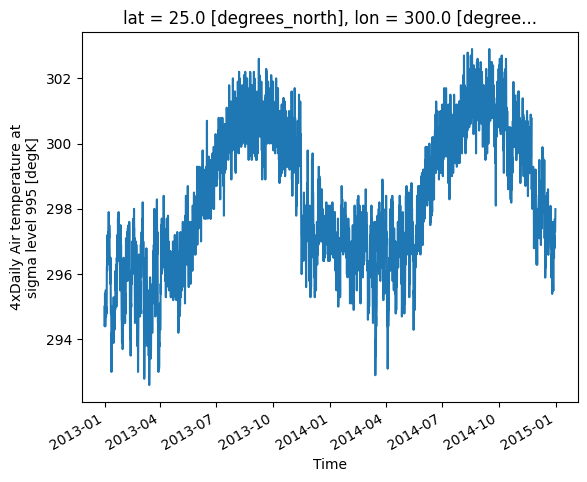

In [54]:
da.isel(lat=20, lon=40).plot();

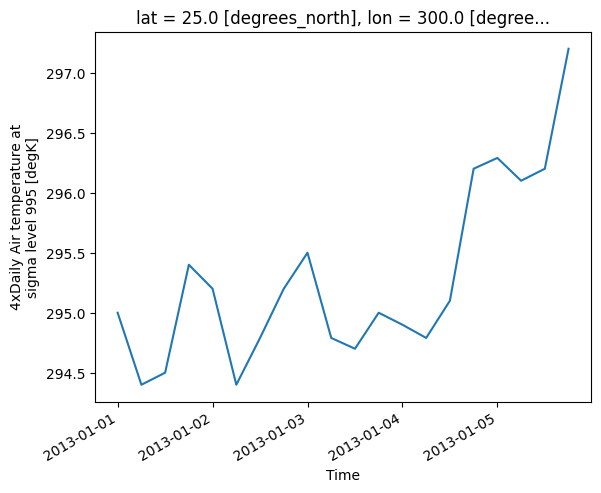

In [55]:
da.isel(time=slice(0, 20), lat=20, lon=40).plot();

Label-based Indexing:

use `.sel`

For example, let’s select all data for Lat 25 °N and Lon 210 °E using sel :

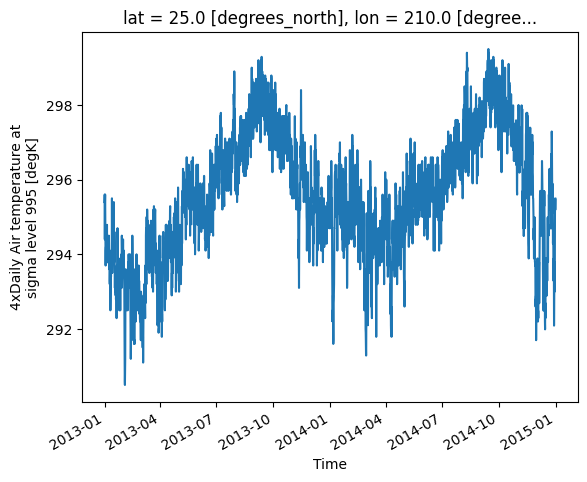

In [56]:
da.sel(lat=25, lon=210).plot();

In [57]:
da.sel(lon=slice(210,215))

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 3)>
244.1 243.9 243.6 243.4 242.4 241.7 ... 298.2 298.1 297.8 298.9 298.7 298.4
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 210.0 212.5 215.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]